In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [362]:
sns.set_style(style = "whitegrid")

In [363]:
df = pd.read_csv("train.csv")

In [364]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [365]:
df.shape

(1460, 81)

In [366]:
#print(df.isnull().sum().to_string())

### we can see what are the dtypes of the data that are present in the dataset. There are three dtypes. 

In [367]:
df.dtypes.sort_values().unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

### Checking how many null values are there in features that are categorical. It shows features such as Fence, Alley, MiscFeature, PoolQC have more that 90% of the data missing. 

In [368]:
g = ((df.select_dtypes(include=['object']))).isnull().sum()
g[g>0].sort_values()

Electrical         1
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

Text(0.5,1,'Number of Nan values for each categorical features')

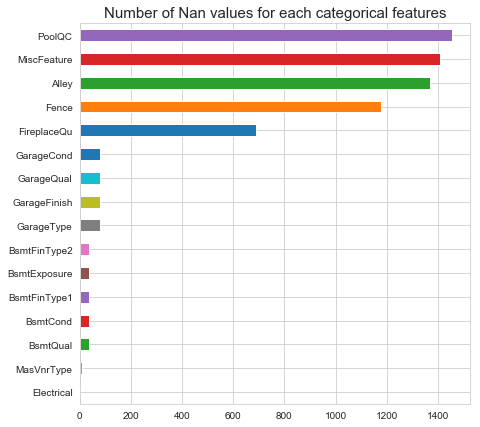

In [369]:
plt.figure(figsize=(7,7))
g[g>0].sort_values().plot.barh()
plt.title("Number of Nan values for each categorical features", fontsize = 15)

### Features having integer dtypes have no null values

In [370]:
((df.select_dtypes(include=['integer']))).isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

### Features having float as dtypes have null values but not as much as object dtypes

In [371]:
((df.select_dtypes(include=['floating'])).isnull().sum())

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

### Corrleatin of numeric data to Target

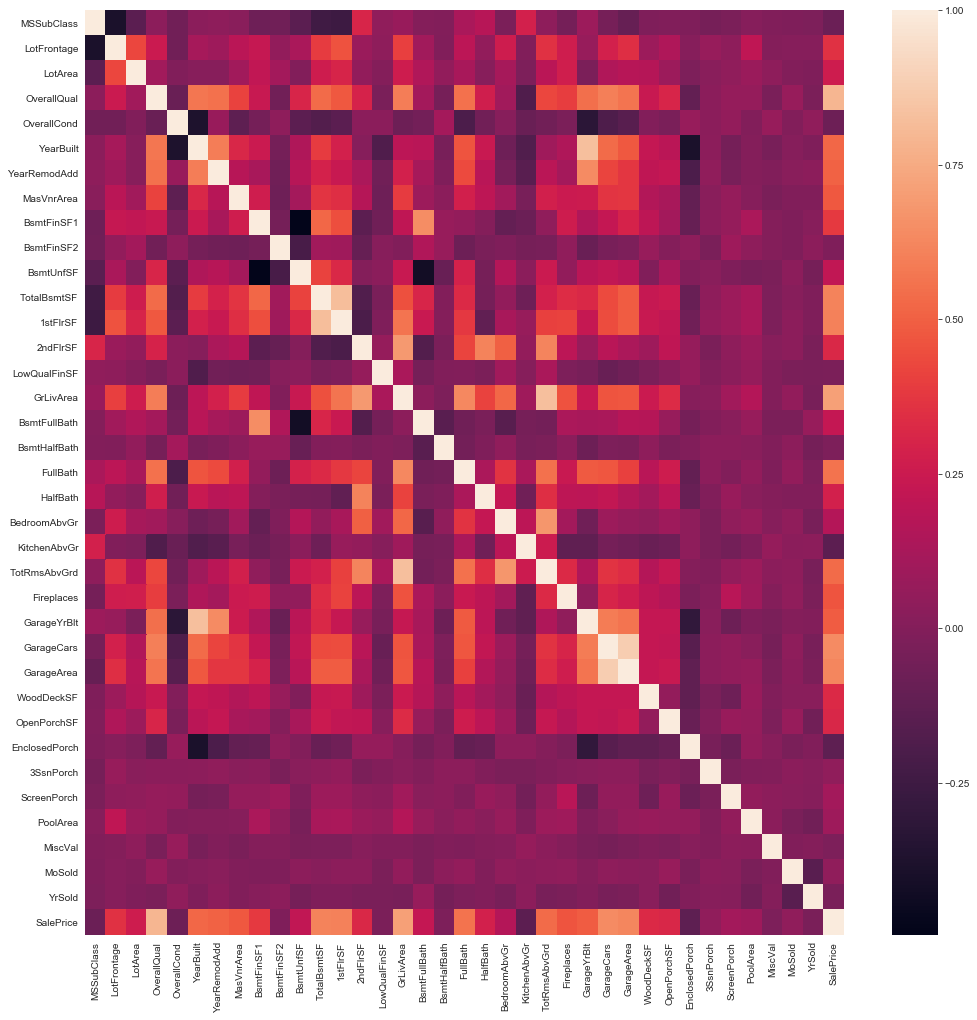

In [372]:
plt.figure(figsize=(17,17))
Num_data = df.drop(columns = "Id").select_dtypes(include = [np.number])
sns.heatmap(Num_data.corr())

## Chossing the one with more pearson corelation coefficient with value higer than 0.5 and lower than 0.5(negative correlation). The heat map for this is shown down when we do analysis for numerical values.

### Checking the distribution of the prices of house.

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


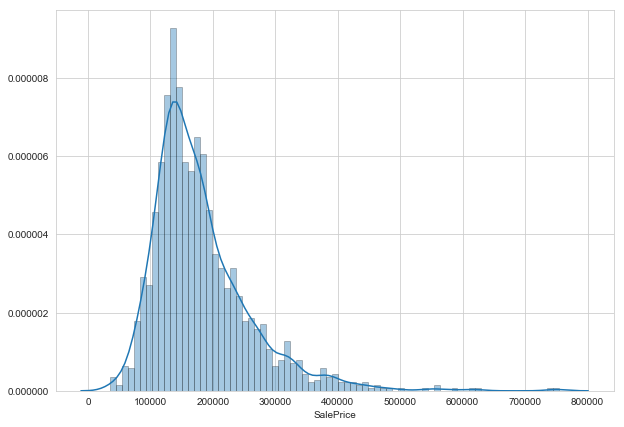

In [373]:
plt.figure(figsize=(10,7))
sns.distplot(df["SalePrice"], hist_kws={"edgecolor" : "k", "linewidth" : 0.6}, bins = 75)

### The above graph looks a bit skewed to the right. But overall the average price 150000-200000 dollars

In [374]:
df["SalePrice"].mean()

180921.19589041095

### Finding the maximum and minimum prices of the houses of the dataset

In [375]:
print("The highest price of the listed house is $", df["SalePrice"].max())

The highest price of the listed house is $ 755000


In [376]:
print("The lowest price of the listed house is $", df["SalePrice"].min())

The lowest price of the listed house is $ 34900


In [377]:
print("The average price of the listed houses is $ {:,.0f}".format (df["SalePrice"].mean()))

The average price of the listed houses is $ 180,921


### Calculating housing prices according to Neighborhood and making a table to see the aggrgrate values(min,max,mean)

In [378]:
Agg = df.groupby("Neighborhood").SalePrice.agg(("max", "min", "mean", "std"))

### Plot a graph to show which maximum, minimum and average price for each neighborhood. there is clearly some neighborhood whose mean, amximum prices are higher than others.

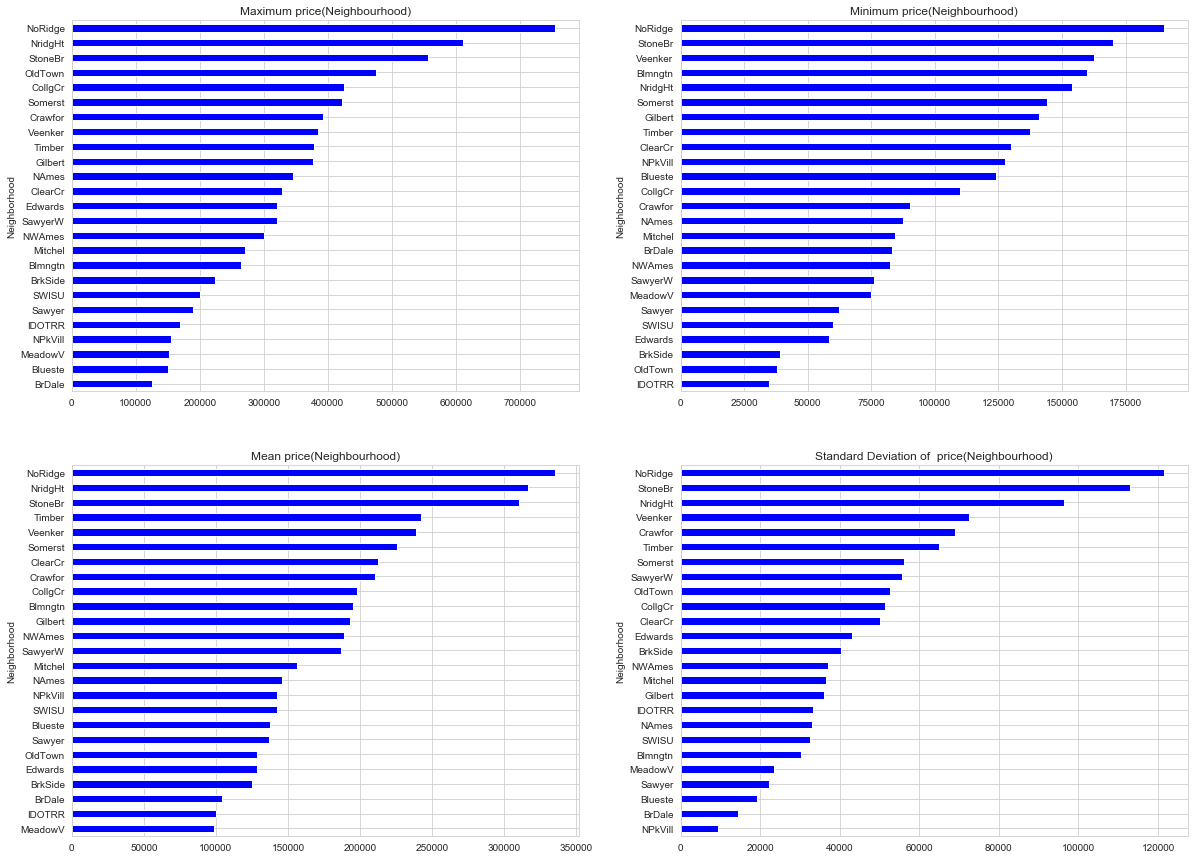

In [379]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1) 
ax1 = fig.add_subplot(2, 2, 2) 
ax2 = fig.add_subplot(2, 2, 3) 
ax3 = fig.add_subplot(2, 2, 4) 


Agg["max"].sort_values().plot(kind='barh', color='blue', figsize=(20, 15), ax=ax0)
ax0.set_title("Maximum price(Neighbourhood)")

Agg["min"].sort_values().plot(kind='barh', color='blue', figsize=(20, 15), ax=ax1)
ax1.set_title("Minimum price(Neighbourhood)")

Agg["mean"].sort_values().plot(kind='barh', color='blue', figsize=(20, 15), ax=ax2)
ax2.set_title("Mean price(Neighbourhood)")

Agg["std"].sort_values().plot(kind='barh', color='blue', figsize=(20, 15), ax=ax3)
ax3.set_title("Standard Deviation of  price(Neighbourhood)")


plt.show()

### Number of houses in each neighborhood

Text(0.5,1,'Number of houses in each Neighbourhood')

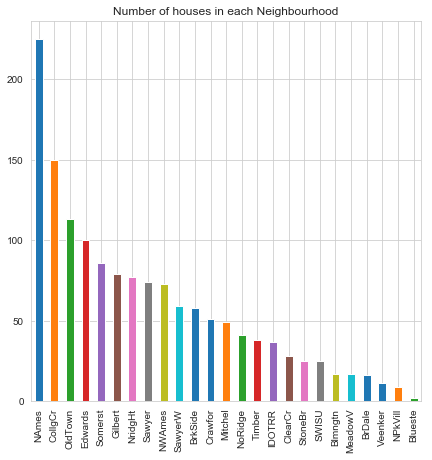

In [380]:
plt.figure(figsize=(7,7))
df["Neighborhood"].value_counts().plot.bar()
plt.title("Number of houses in each Neighbourhood")

### Checking out the number of houses and the years they were built. The top 10 list suggests that there is a mix of houses that are pretty old and some are new. The bootom of the list suggests that the houses that are 100 years old are fewer in number

In [381]:
df.groupby('YearBuilt').Id.count().sort_values(ascending = False).head(10)

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
Name: Id, dtype: int64

In [382]:
df.groupby('YearBuilt').Id.count().sort_values(ascending = False).tail(10)

YearBuilt
1893    1
2010    1
1898    1
1904    1
1905    1
1906    1
1911    1
1913    1
1917    1
1872    1
Name: Id, dtype: int64

In [383]:
print("The oldest house in the list was built in ", df["YearBuilt"].min())

The oldest house in the list was built in  1872


In [384]:
print("The newest house in the list was built in ", df["YearBuilt"].max())

The newest house in the list was built in  2010


### Checking out the barplot for the mean of the prices according to the years they were built. The top 20 with highest mean are the houses that a quite years apart. Some Houses older than 100 years also have high prices(1893 ans 1892). The houses that were older than 100 years are mostly in the bottom of the list with lower mean price

In [385]:
Year_max = df.groupby("YearBuilt").SalePrice.mean().sort_values(ascending = False).head(20)

In [386]:
Year_min = df.groupby("YearBuilt").SalePrice.mean().sort_values(ascending = False).tail(20)

Text(0.5,1,'Years and bottom 20 mean Price')

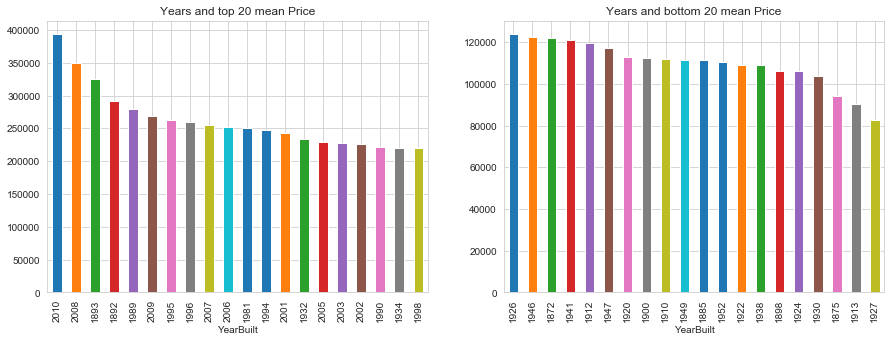

In [387]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)


Year_max.plot(kind= "bar", ax = ax0, figsize=(15,5))
ax0.set_title("Years and top 20 mean Price")
Year_min.plot(kind= "bar", ax = ax1, figsize=(15,5))
ax1.set_title("Years and bottom 20 mean Price")


### Plotting to see the fluctuation of prices through out the years. We can see the prices went up during the late 1800s. It rose again during the 1940s. And the fluctuation continues since.

In [388]:
Year = df.groupby("YearBuilt").SalePrice.mean()

Text(0.5,1,'Changes of prices over the years')

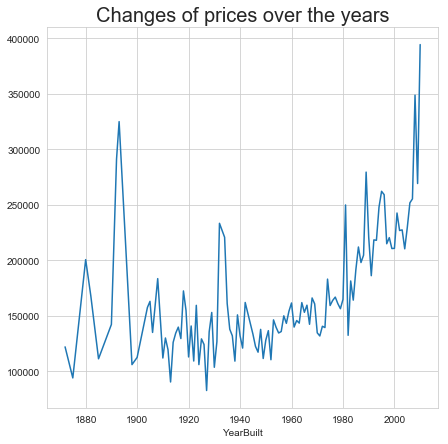

In [389]:
plt.figure(figsize=(7,7))
Year.plot()
plt.title("Changes of prices over the years", fontsize = 20)

### Plotting average bedroom in the house shows  houses have in average 3 bedrooms.

Text(0.5,1,'Average bedroom per house')

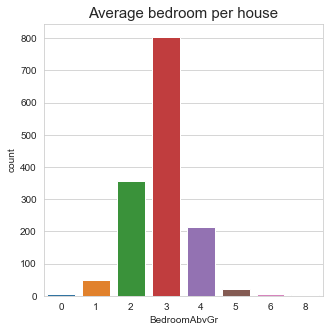

In [390]:
plt.figure(figsize=(5,5))
sns.countplot(df["BedroomAbvGr"])
plt.title("Average bedroom per house", fontsize = 15)

### Plotting to see distribution of total number of rooms in the house which is 5-7. We can see that the number of rooms and price increase linearly, but drops when houses have more than 11 rooms

Text(0.5,1,'Distribution of total number rooms')

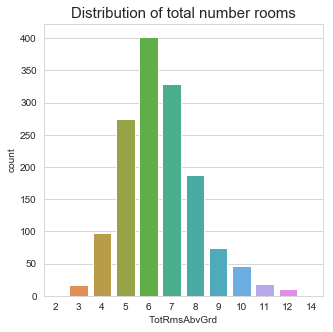

In [391]:
plt.figure(figsize=(5,5))
sns.countplot(df["TotRmsAbvGrd"])
plt.title("Distribution of total number rooms", fontsize = 15)

Text(0.5,1,'Mean Price and number of rooms')

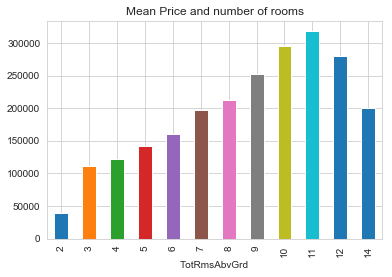

In [392]:
Room_price = df.groupby("TotRmsAbvGrd").SalePrice.mean()
Room_price.plot(kind = "bar")
plt.title("Mean Price and number of rooms")

### Fireplace vs SalePrice. Most of the houses have none or 1 fireplace. Boxplot of Fireplace vs Price shows that th e median price for houses having 2, 3 fireplace is similar, but the range for houses having 2 fireplace is higher 

Text(0,0.5,'No. of houses')

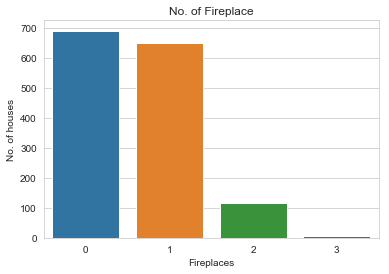

In [393]:
sns.countplot(df["Fireplaces"])
plt.title("No. of Fireplace")
plt.ylabel("No. of houses")

Text(0.5,1,'BoxPlot Fireplace vs price')

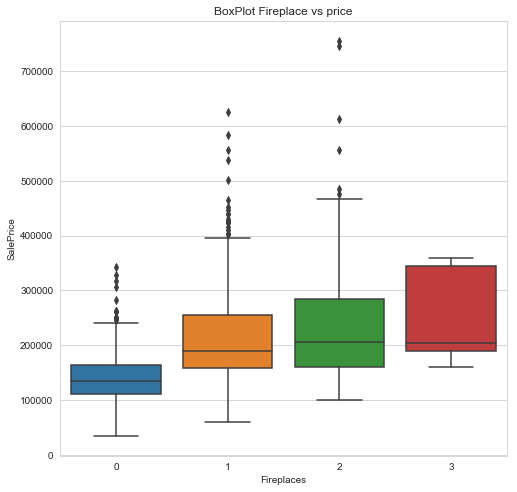

In [394]:
plt.figure(figsize=(8,8))
sns.boxplot(x = "Fireplaces", y = "SalePrice", data = df)
plt.title("BoxPlot Fireplace vs price")

### GarageCars vs Saleprice

### We can see the price is higher if the Garagecars increase with the median price highest at Garagecars = 3. The price is lowest when there are no garage 

Text(0.5,1,'Boxplot Garagecars vs price')

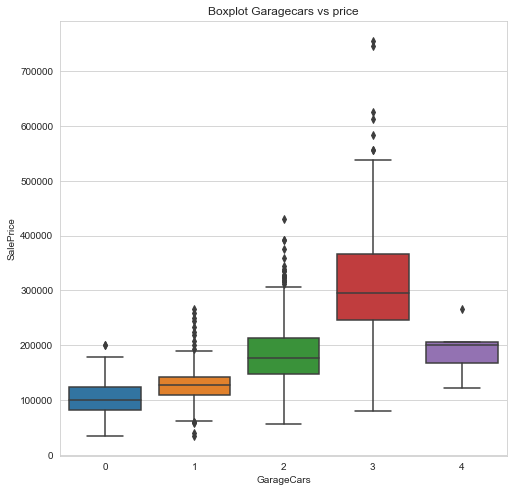

In [395]:
plt.figure(figsize=(8,8))
sns.boxplot(x = df["GarageCars"], y = df["SalePrice"])
plt.title("Boxplot Garagecars vs price")

### Condition1 vs Saleprice

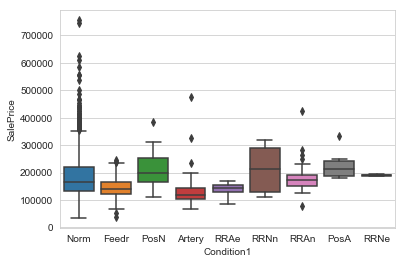

In [396]:
sns.boxplot(x =df.Condition1, y= df.SalePrice, data = df)

### LotArea Vs Price scatterplot shws that the bigger the lot, higher the price. Since the range of the lot is clustered, there are outliers

Text(0.5,1,'ScatterPlot for LotArea vs Price')

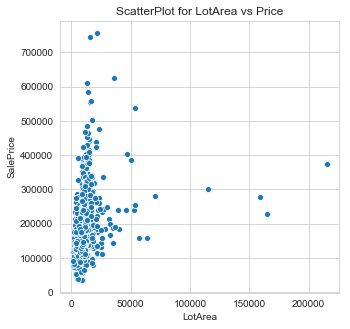

In [397]:
plt.figure(figsize=(5,5))
sns.scatterplot(df["LotArea"], df["SalePrice"], data = df)
plt.title("ScatterPlot for LotArea vs Price")

### OverallQual vs Saleprice
### The striplpot below shows that the median SalePrice increases with increase in overallqual

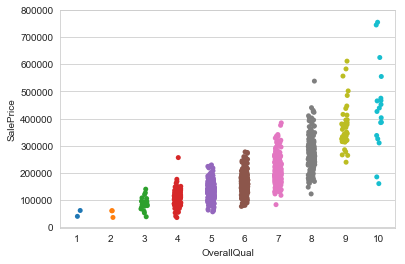

In [398]:
sns.stripplot(df["OverallQual"], df["SalePrice"])

### The living area of the house may play an important role in determining the price. It shows that the price increases as the area of the house increases.

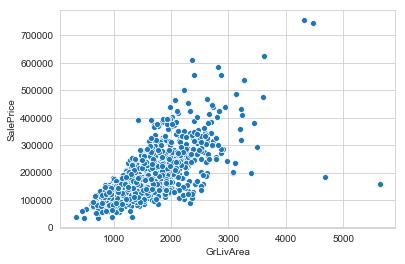

In [399]:
sns.scatterplot(df["GrLivArea"], df["SalePrice"])

### For these Cateogorical values, let us use mode of the particular columns and use it substitute the Nan values 

In [400]:
colls = ['Electrical', 'MasVnrType', 'MSZoning', 'Functional', 'Utilities','Exterior1st', 'Exterior2nd', 
         'KitchenQual', 'SaleType']
for data in colls:
    df[data] = df[data].fillna(df[data].mode()[0])

### For these categorical values listed, we will simply replace the null value with None.

In [401]:
df[['Alley','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1', 
        'BsmtFinType2','FireplaceQu','GarageType','GarageFinish', 'GarageQual', 
        'GarageCond','PoolQC','Fence','MiscFeature']]= df[['Alley','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1', 
        'BsmtFinType2','FireplaceQu','GarageType','GarageFinish', 'GarageQual', 
        'GarageCond','PoolQC','Fence','MiscFeature']].fillna("None")

### Replacing appropriate values  for missing numeric value

In [402]:
d = df.select_dtypes(include = [np.number]).isnull().sum()
d[d>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

### Imputing LotFrontage which has 259 values missing. We will use median of the LotFrontage based on the neighborhood which it exists in. First grouping it using groupby and imputing its median

In [403]:
g11 = df.groupby("Neighborhood").LotFrontage.median()
g11

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [404]:
def impute_lotfrontage(cols):
    LotFrontage = cols[0]
    Neighborhood = cols[1]
    if pd.isnull(LotFrontage):
        
        if Neighborhood in g11.keys():
            return g11.get(Neighborhood, default=None)
        
    else:
        return LotFrontage

In [405]:
df["LotFrontage"] = df[["LotFrontage", "Neighborhood"]].apply(impute_lotfrontage, axis =1)


In [406]:
df["LotFrontage"].isnull().any()

False

### Garage year Built can just be replace by Tear the house is built

In [407]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df.YearBuilt)
df["GarageYrBlt"].isnull().any()

False

In [408]:
#df.head()

### Let us impute the value of MasVnrArea based on the median of the MasVnrType.

In [409]:
g12 = df.groupby("MasVnrType").MasVnrArea.median()
g12

MasVnrType
BrkCmn     192.0
BrkFace    202.0
None         0.0
Stone      206.5
Name: MasVnrArea, dtype: float64

In [410]:
def impute_masvnrtype(cols):
    
    MasVnrType = cols[1]
    MasVnrArea = cols[0]
    
    if pd.isnull(MasVnrArea):
        if MasVnrType in g12.keys():
            return g12.get(MasVnrType)
    else:
        return MasVnrArea
    
    

In [411]:
df["MasVnrArea"]= df[["MasVnrArea", "MasVnrType"]].apply(impute_masvnrtype, axis = 1)


### Let us make a heatmap of numerical values that are highly correlated with Saleprice. We will drop columns that are highly correlated with each others as well.

In [412]:
d = df.select_dtypes(include = [np.number])


### Taking the top 6 highly correlated (positive) features from the list

In [413]:
f = d.corr().unstack()["SalePrice"]
f1 = f.sort_values(ascending = False)[0:7]
f1

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
dtype: float64

In [414]:
### Taking the top 6 negatively correlated  features from the list
p1 = f.sort_values(ascending = False)[:-7:-1]
p1

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
dtype: float64

### Getting the names of the columns from above two positively and negatively correlated features to make a heatmap

In [415]:
colls12 = f1.keys().append(p1.keys())

In [416]:
colls12  # These are the columns which are postively and negatively correlated with SalePrice

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'KitchenAbvGr', 'EnclosedPorch',
       'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF'],
      dtype='object')

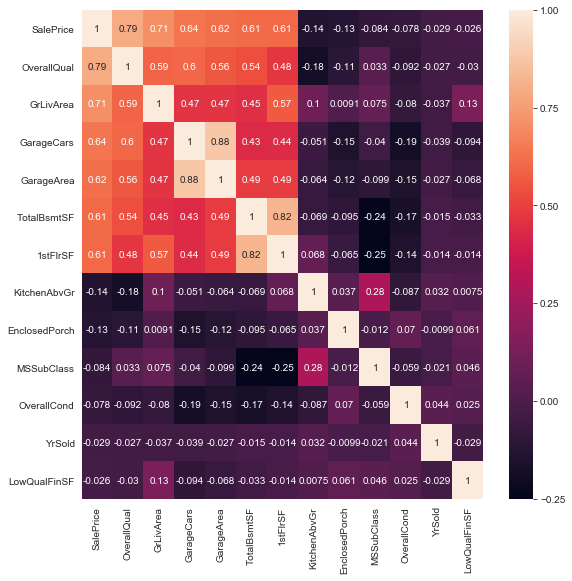

In [417]:
plt.figure(figsize =(9,9))
sns.heatmap(df[colls12].corr(), annot= True)

### We can see that the heatmap shows colinearlity between some of the features themselves. So, Dropping features that have high correlation among themselves

In [418]:
df.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'],axis =1, inplace = True)

### Lets change ordinal values to numeric first. Since ordinal features have orders among themselves. It is logical to use numeric values that dummy variable.

#### This is changed from the previous file because I changed it to dummy variable now.

df["LotShape"] = df.LotShape.replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})


df.select_dtypes(include = ["object"]).columns

df['Utilities'] = df["Utilities"].replace({'AllPub':0, 'NoSeWa':1})
df["LandSlope"] = df["LandSlope"].replace({'Gtl':0, 'Mod':1, 'Sev':2})
df["ExterQual"] = df["ExterQual"].replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})

df["ExterCond"] = df["ExterCond"].replace({'TA':0, 'Gd':1, 'Fa':2, 'Po':3,'Ex':4})
df["BsmtQual"] = df["BsmtQual"].replace({'Gd':0, 'TA':1, 'Ex':2, 'None':3,'Fa':4})
df["BsmtCond"] = df["BsmtCond"].replace({'TA':0, 'Gd':1, 'None':2, 'Fa':3,'Po':4})
df["BsmtExposure"] = df["BsmtExposure"].replace({'No':0, 'Gd':1, 'Mn':2, 'Av':3,'None':4})
df["BsmtFinType1"] = df["BsmtFinType1"].replace({'GLQ':0, 'ALQ':1, 'Unf':2, 'Rec':3, 'BLQ':4, 'None':5, 'LwQ':6})
df["BsmtFinType2"] = df["BsmtFinType2"].replace({'Unf':0, 'BLQ':1, 'None':2, 'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6})
df["HeatingQC"] = df["HeatingQC"].replace({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4})
df["Electrical"] = df["Electrical"].replace({'SBrkr':0, 'FuseF':1, 'FuseA':2, 'FuseP':3, 'Mix':4})

df["KitchenQual"] = df["KitchenQual"].replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})
df["Functional"] = df["Functional"].replace({'Typ':0, 'Min1':1, 'Maj1':2, 'Min2':3, 'Mod':4, 'Maj2':5, 'Sev':6})
df["FireplaceQu"] = df["FireplaceQu"].replace({'None':0, 'TA':1, 'Gd':2, 'Fa':3, 'Ex':4, 'Po':5})
df["GarageFinish"] = df["GarageFinish"].replace({'RFn':0, 'Unf':1, 'Fin':2, 'None':3})
df["GarageQual"] = df["GarageQual"].replace({'TA':0, 'Fa':1, 'Gd':2, 'None':3, 'Ex':4, 'Po':5})
df["GarageCond"] = df["GarageCond"].replace({'TA':0, 'Fa':1, 'None':2, 'Gd':3, 'Po':4, 'Ex':5})
df["PavedDrive "]= df["PavedDrive"].replace({'Y':0, 'N':1, 'P':2})
df["PoolQC"] = df["PoolQC"].replace({'None':0, 'Ex':1, 'Fa':2, 'Gd':3})
df["Fence"]= df["Fence"].replace({'None':0, 'MnPrv':1, 'GdWo':2, 'GdPrv':3, 'MnWw':4})


### Getting dummy variable for these variable and checking if it prodices good score.

In [419]:
col123 = ["ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC", "KitchenQual","Functional",
        "FireplaceQu","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence",'LotShape', 'Utilities', 'LandSlope', 
          'ExterQual', 'Electrical' ]
df = pd.get_dummies(df, columns = col123)

In [420]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
       ...
       'LandSlope_Sev', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd',
       'ExterQual_TA', 'Electrical_FuseA', 'Electrical_FuseF',
       'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr'],
      dtype='object', length=159)

### Getting dummy variable for other categorical values which are not ordinal in nature. These are values which have no hierachy with in themselves 

In [421]:
coll122 = ["MSZoning", "Street", "Alley" ,"LandContour" ,"LotConfig", "Neighborhood", "Condition1" ,"Condition2", 
           "BldgType","HouseStyle" ,"RoofStyle", "RoofMatl" ,"Exterior1st" ,"Exterior2nd", "MasVnrType",
           "Foundation" ,"Heating","CentralAir", "GarageType" ,"MiscFeature" , "SaleType" ,"SaleCondition"]
df = pd.get_dummies(df, columns = coll122)

In [422]:
df.isnull().any().sum() ## looks like there are no null values in our dataframe

0

In [423]:
df.select_dtypes(include = [object]).columns

Index([], dtype='object')

### Dropping Id and SalePrice for Linear Regression

In [424]:
X = df.drop(["Id","SalePrice"], axis = 1)
y =df["SalePrice"]

### Modelling Train Test Split and Linear Regression

In [425]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [426]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [427]:
yhat = lre.predict(X_test)

### Using  mean_squared_error, mean_absolute_error for our model

In [428]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#mse = mean_squared_error(y_test, yhat)
#print('The mean square error of price and predicted value is {:,.2f} '.format(mse))

#### Dropped Mean squared error as it is difficult to interpret.

### The mean absolute error is about 18,200 dollars suggests that the average error for each prediction which is quite high.
### The higher RMSE suggests that there are some high variance among the actual and predicted values. There are some outliers which may have increased its value.

In [429]:
print("The mean absolute error of price and predicted value is {:,.2f}".format(mean_absolute_error(y_test, yhat)))
print("The root mean absolute error of price and predicted value is {:,.2f}".format(np.sqrt(mean_squared_error(y_test, yhat))))


The mean absolute error of price and predicted value is 18,199.75
The root mean absolute error of price and predicted value is 38,074.67


### The R squared looks quite reasonable. It suggests that 89% of the variance has been acounted by our model. It could well be made better if we use more feature extraction and engineering.

In [430]:
print('The R-square is: ', lre.score(X, y))

The R-square is:  0.8817252250299653


In [431]:
y_test[0:10]

378     394432
1098    128000
484     132500
324     242000
146     105000
270     266000
1163    108959
1018    160000
1290    180500
1180    250000
Name: SalePrice, dtype: int64

In [432]:
yhat[0:10]

array([382885.8769507 , 131981.39723641, 132029.02489299, 276223.16250182,
       111705.54537836, 257331.16444668, 121754.27408377, 151826.33437874,
       175557.42773389, 190378.03539449])

### Making a scatterplot to see if the actual price vs predicted price. The scatterplot seems to be a straight line, except for some outliers

Text(0,0.5,'Predicted Price')

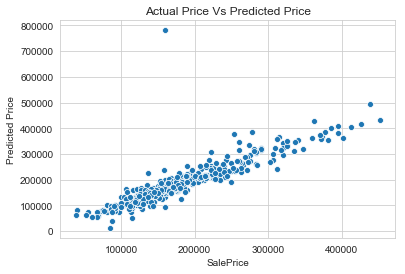

In [433]:
ax1 = sns.scatterplot(x = y_test, y = yhat)
ax1.set_title("Actual Price Vs Predicted Price")
ax1.set_xlabel("SalePrice")
ax1.set_ylabel("Predicted Price")

### Making a price distribution of the fitted and actual price

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Proportion of house')

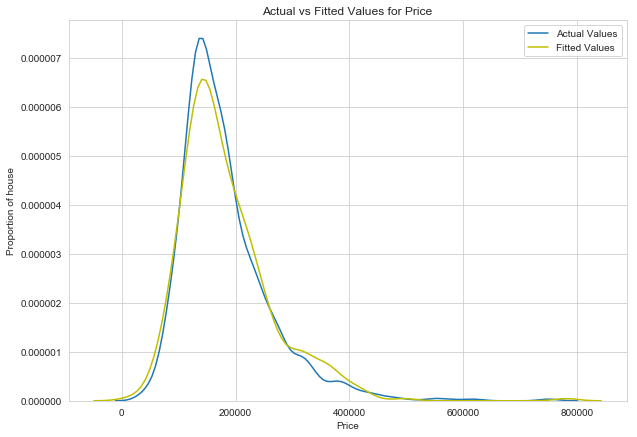

In [434]:
plt.figure(figsize=(10,7))

ax1 = sns.distplot(y, hist = False, label="Actual Values")
sns.distplot(yhat, hist = False, color="y", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of house')



### The fitted distribution plot seems to have a normal distribution and seems on average to have a similar median to the test saleprice(Actual Price)

### K-fold cross_validation and calculating the R^2 

In [435]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, X, y, cv = 10) # k fold = 30


### Taking the mean from of all the  30  r^2 value and their standard deviation

In [436]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5984074726800903 and the standard deviation is 0.5988085648298512


### Need to do more feature engineering and feature selection to get a better score. May be do Ridge and Lasso  Regression in the future

In [437]:
print(df["SalePrice"].mean())
print(df["SalePrice"].max())
print(df["SalePrice"].min())
print(df["SalePrice"].std())

180921.19589041095
755000
34900
79442.50288288663


In [438]:
print(yhat.mean())
print(yhat.max())
print(yhat.min())
print(yhat.std())

183411.57807050392
781281.2044810085
12007.593109512236
81835.67796844548
